In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


school_id department_id student_id student_name state location1 location2
0       001        001012   10246842          黃士玹    正1        南部      台南考區
1       001        001012   10042237          黃冠婷    正2        北部      台北考區
2       001        001012   10008031          鍾大方    正3        北部      台北考區
3       001        001012   10201525          曾信豪    正4        中部      彰化考區
4       001        001012   10014615          陳品儒    正5        北部      台北考區
5       001        001012   10294018          侯思筠    正6        東部      宜蘭考區
6       001        001012   10022810          吳悅慈    正7        北部      台北考區
7       001        001012   10236223          陳俞潔    正8        南部      台南考區
8       001        001012   10025909          蕭宇廷    正9        北部      台北考區
9       001        001012   10123708          吳岱軒   正10        北部      中壢考區

In [2]:
print("academic department basic information:")
uname.head(10)

academic department basic information:


year school_id department_id school_name department_name category_id  \
0  106       006        006042      國立政治大學            教育學系           1   
1  106       006        006052      國立政治大學       教育學系(公費生)           1   
2  106       006        006062      國立政治大學    教育學系(原住民公費生)           1   
3  106       006        006022      國立政治大學            歷史學系           2   
4  106       006        006152      國立政治大學            民族學系           2   
5  106       006        006032      國立政治大學             哲學系           2   
6  106       006        006262      國立政治大學          英國語文學系           2   
7  106       006        006292      國立政治大學          日本語文學系           2   
8  106       006        006272      國立政治大學         阿拉伯語文學系           2   
9  106       006        006302      國立政治大學          韓國語文學系           2   

  category_name school_name_abbr department_name_abbr  
0            教育               政大                   教育  
1            教育               政大                教育(公)  
2            教育               政大              教育(原住民)  
3         藝術及人文               政大                   歷史  
4         藝術及人文               政大                  民族學  
5         藝術及人文               政大                   哲學  
6         藝術及人文               政大                 英國語文  
7         藝術及人文               政大                 日本語文  
8         藝術及人文               政大                阿拉伯語文  
9         藝術及人文               政大                 韓國語文

In [ ]:
'''
Q1.1: Report the number of academic department and student applicants in your dataset. 
Q1.2: Report the top ten departments that recieved the most applications and the number of applications they received. Identify the department by their department_id and names.
'''

In [3]:
stu = stu_adm.copy()
old = stu.shape
new = []

while(old != new):
    # student >= 10
    row = stu.groupby('department_id').count()
    row = row[row.student_id >= 10]
    row = list(row.index)
    stu = stu[stu.department_id.isin(row)]
    old = stu.shape
    
    # application > 1
    col = stu.groupby('student_id').count()
    col = col[col.department_id > 1]
    col = list(col.index)
    stu = stu[stu.student_id.isin(col)]
    new = stu.shape
    

In [5]:
uname['combine'] = uname['school_name_abbr'].map(str) + uname['department_name_abbr']
todo = pd.crosstab(index=stu['department_id'], columns = stu['student_id'])
todoDf = todo.merge(uname, how = 'left', left_on='department_id', right_on='department_id')
todoMatrix = np.matrix(todo)

In [6]:
todoMatrix.shape

(1917, 47386)

In [7]:
print('number of academic department:', todoMatrix.shape[0])
print('number of student applicants:', todoMatrix.shape[1])
# top ten department
topten = stu.groupby('department_id').count()
topten = topten.sort_values(by='student_id', ascending=False)
print('top ten departments:')
for d in topten['student_id'][:10].index:
    print('department_id:', d,' department_name:', uname[uname.department_id==d].iloc[0]['department_name'])

number of academic department: 1917
number of student applicants: 47386
top ten departments:
department_id: 008122  department_name: 機械工程學系
department_id: 012052  department_name: 藥學系
department_id: 046032  department_name: 會計學系（臺北校區）
department_id: 004382  department_name: 電機工程學系
department_id: 008112  department_name: 土木工程學系
department_id: 005192  department_name: 企業管理學系
department_id: 005182  department_name: 會計學系
department_id: 015342  department_name: 財務金融學系
department_id: 045012  department_name: 電機工程學系
department_id: 015222  department_name: 資訊工程學系


In [4]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjh.ttc')

def draw(df, method):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('1st component', fontsize = 15)
    ax.set_ylabel('2nd component', fontsize = 15)
    ax.set_title(method, fontsize = 20)
    targets = df['category_name'].unique()
    for target in targets:
        indicesToKeep = df['category_name'] == target
        ax.scatter(df.loc[indicesToKeep, 'pc1']
                   , df.loc[indicesToKeep, 'pc2']
                   , s = 50)
    ax.legend(targets, prop=myfont)
    ax.grid()

In [ ]:
'''Q2.1: Visualize academic departments using the first 8 principle components'''

In [25]:
from sklearn.decomposition import PCA

pc = PCA(n_components=8).fit_transform(todoMatrix)
principalDf = pd.DataFrame(data = pc, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
principalDf_final = pd.concat([principalDf, todoDf['department_id'], todoDf['category_name']], axis = 1)

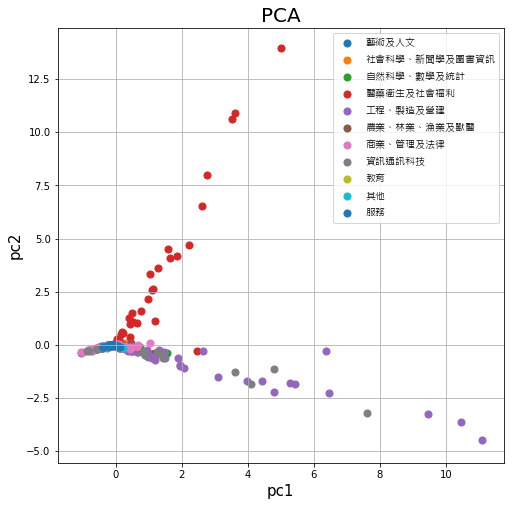

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = principalDf_final['category_name'].unique()
for target in targets:
    indicesToKeep = principalDf_final['category_name'] == target
    ax.scatter(principalDf_final.loc[indicesToKeep, 'pc1']
               , principalDf_final.loc[indicesToKeep, 'pc2']
               , s = 50)
ax.legend(targets,prop=myfont)
ax.grid()

In [ ]:
'''
1st principal component和2nd principal component明顯地將'醫藥衛生及社會福利'與'工程、製造及營建'區分出來
'''

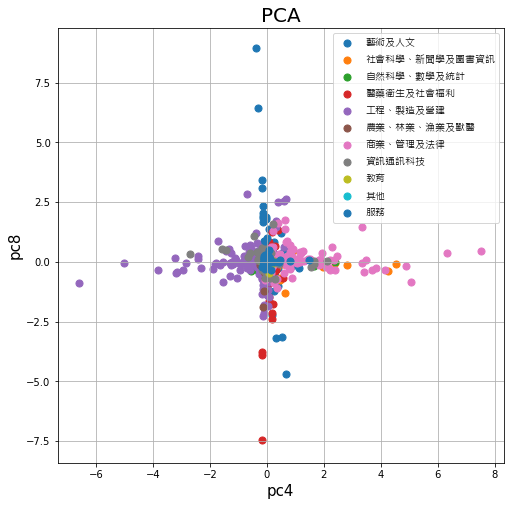

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc4', fontsize = 15)
ax.set_ylabel('pc8', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = principalDf_final['category_name'].unique()
for target in targets:
    indicesToKeep = principalDf_final['category_name'] == target
    ax.scatter(principalDf_final.loc[indicesToKeep, 'pc4']
               , principalDf_final.loc[indicesToKeep, 'pc8']
               , s = 50)
ax.legend(targets, prop=myfont)
ax.grid()

In [ ]:
'''
4th principal component和8th principal component將'商業、管理及法律'、'藝術及人文'與'工程、製造及營建'區分出來
'''

In [ ]:
'''Q2.2: Visualize academic department using multiple dimensional scaling'''

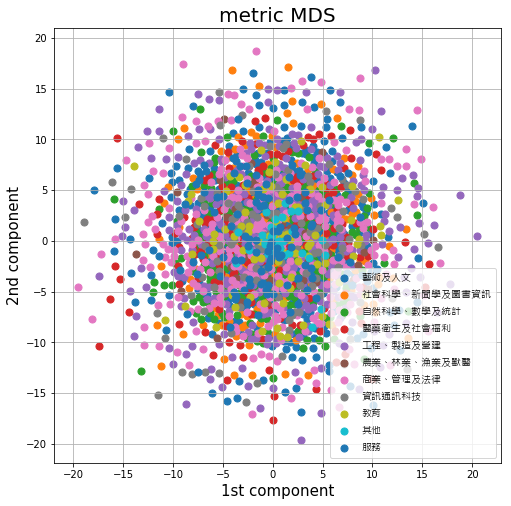

In [28]:
from sklearn.manifold import MDS
# metric setting
embedding = MDS(n_components=2)
todo_mds = embedding.fit_transform(todoMatrix)
mdsDf = pd.DataFrame(data = todo_mds, columns = ['pc1', 'pc2'])
mdsDf_final = pd.concat([mdsDf, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(mdsDf_final, 'metric MDS')

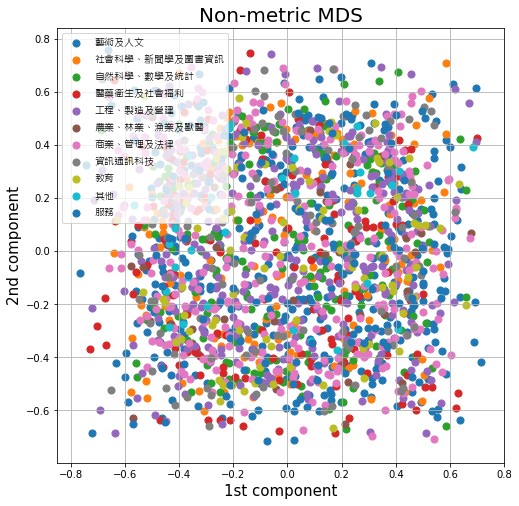

In [29]:
# non-metric setting
embedding2 = MDS(n_components=2, metric=False)
todo_nmds = embedding2.fit_transform(todoMatrix)
nmdsDf = pd.DataFrame(data = todo_nmds, columns = ['pc1', 'pc2'])
nmdsDf_final = pd.concat([nmdsDf, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(nmdsDf_final, 'Non-metric MDS')

In [ ]:
'''
該資料集不適用metric MDS及non-metric MDS方法，所有系所類別顏色點重疊情況多，效果不好，non-metric又比metric分得更不清楚
'''

In [86]:
'''
Q2.3: Visualize academic department using Locally Linear Embedding. Consider three variations: 
(1) Use 20 neighbors to construct the weight matrix; 
(2) Use 40 neighbors to construct the weight matrix; 
(3) Perform PCA transformation first, and use the first 100 principle components as the input to LLE (with 20 neighbors).
'''

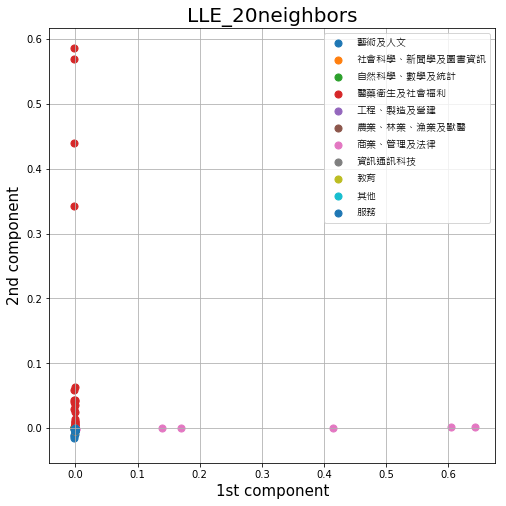

In [30]:
from sklearn.manifold import LocallyLinearEmbedding

todo_lle1 = LocallyLinearEmbedding(n_neighbors=20, n_components=2).fit_transform(todoMatrix)
lle1Df = pd.DataFrame(data = todo_lle1, columns = ['pc1', 'pc2'])
lle1Df_final = pd.concat([lle1Df, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(lle1Df_final, 'LLE_20neighbors')

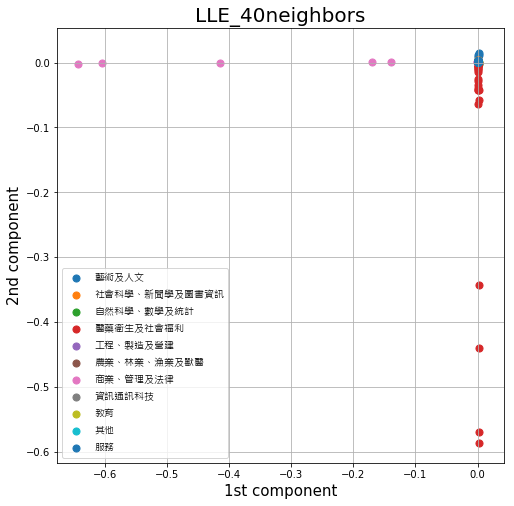

In [11]:
from sklearn.manifold import LocallyLinearEmbedding
todo_lle2 = LocallyLinearEmbedding(n_neighbors=40, n_components=2).fit_transform(todoMatrix)
lle2Df = pd.DataFrame(data = todo_lle2, columns = ['pc1', 'pc2'])
lle2Df_final = pd.concat([lle2Df, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(lle2Df_final, 'LLE_40neighbors')

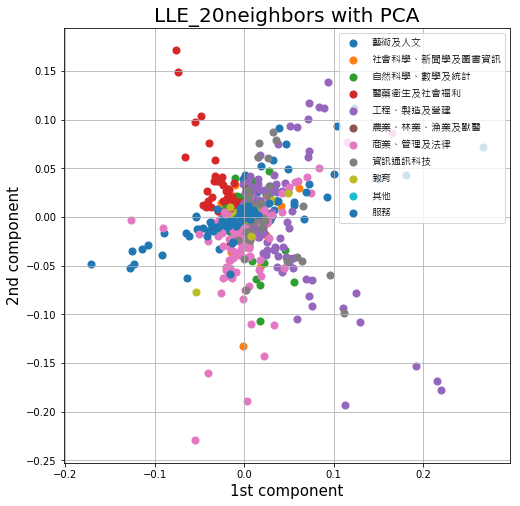

In [33]:
pca = PCA(n_components=100).fit_transform(todoMatrix)
todo_lle3 = LocallyLinearEmbedding(n_neighbors=20, n_components=2).fit_transform(pca)
lle3Df = pd.DataFrame(data = todo_lle3, columns = ['pc1', 'pc2'])
lle3Df_final = pd.concat([lle3Df, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(lle3Df_final, 'LLE_20neighbors with PCA')

In [ ]:
'''
先用PCA降成100維的Locally Linear Embedding方法並沒有顯著比沒先用PCA好，
20 neighbors比40 neighbors表現好，可能是因為鄰居40個分太細
'''

In [ ]:
'''
Q2.4: Visualize academic department using Kernel PCA. You should at least consider the RBF and Cosine kernel. 
It is your responsibility to select reasonably good kernel parameters.
'''

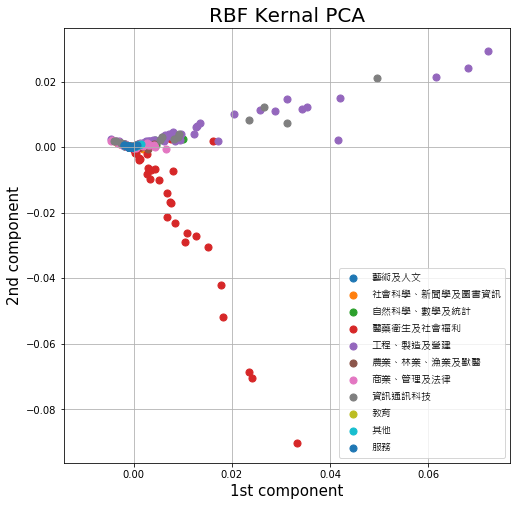

In [34]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='rbf')
todo_rbf = transformer.fit_transform(todoMatrix)
rbfDf = pd.DataFrame(data = todo_rbf, columns = ['pc1', 'pc2'])
rbfDf_final = pd.concat([rbfDf, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(rbfDf_final,'RBF Kernal PCA')

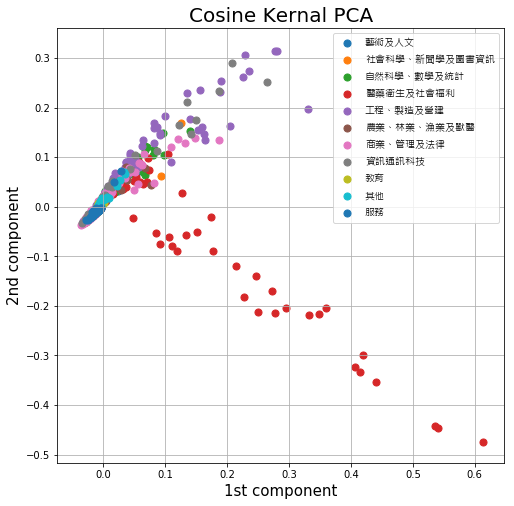

In [35]:
transformer = KernelPCA(n_components=2, kernel='cosine')
todo_cos = transformer.fit_transform(todoMatrix)
cosDf = pd.DataFrame(data = todo_cos, columns = ['pc1', 'pc2'])
cosDf_final = pd.concat([cosDf, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(cosDf_final, 'Cosine Kernal PCA')

In [ ]:
'''
RBF kernel PCA 明顯將'醫藥衛生及社會福利'和'工程、製造及營建'區分出來，對該資料集而言，效果與前述的PCA差不多
RBF和Cosine kernel PCA 沒有明顯優劣
'''

In [ ]:
'''
Q2.5: Visualize academic department using t-SNE. You should consider at least the Euclidian, Cosine, and Jaccard metric. 
Set numpy random seed so that your results can be repeated.
'''

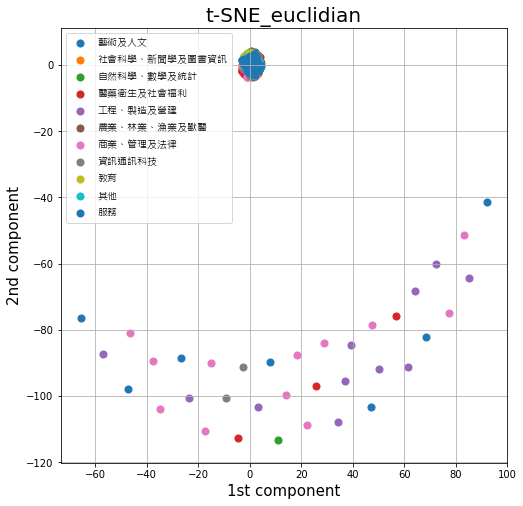

In [36]:
from sklearn.manifold import TSNE
np.random.seed(5)
todo_tsne_euc = TSNE(n_components=2,metric='euclidean',random_state=10).fit_transform(todoMatrix)
tsne_eucDf = pd.DataFrame(data = todo_tsne_euc, columns = ['pc1', 'pc2'])
tsne_eucDf_final = pd.concat([tsne_eucDf, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(tsne_eucDf_final, 't-SNE_euclidian')

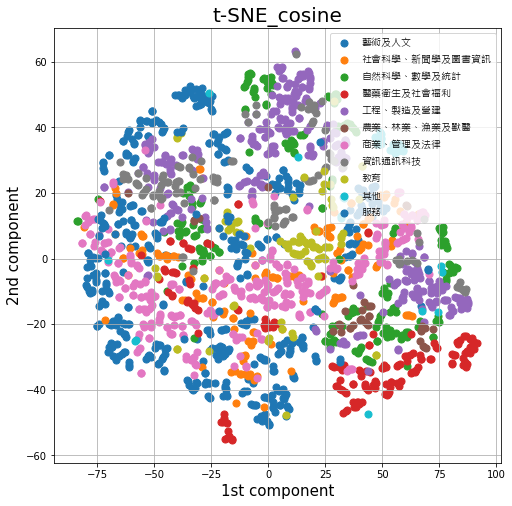

In [162]:
todo_tsne_cos = TSNE(n_components=2,metric='cosine',random_state=10).fit_transform(todoMatrix)
tsne_cosDf = pd.DataFrame(data = todo_tsne_cos, columns = ['pc1', 'pc2'])
tsne_cosDf_final = pd.concat([tsne_cosDf, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(tsne_cosDf_final, 't-SNE_cosine')

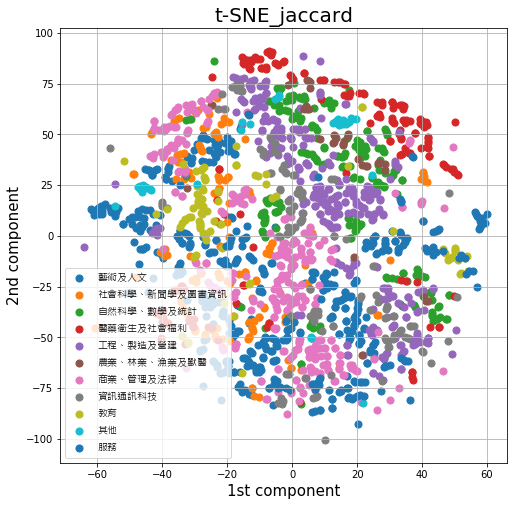

In [37]:
todo_tsne_jac = TSNE(n_components=2,metric='jaccard',random_state=10).fit_transform(todoMatrix)
tsne_jacDf = pd.DataFrame(data = todo_tsne_jac, columns = ['pc1', 'pc2'])
tsne_jacDf_final = pd.concat([tsne_jacDf, todoDf['department_id'], todoDf['category_name']], axis = 1)
draw(tsne_jacDf_final, 't-SNE_jaccard')

In [ ]:
'''
euclidian t-SNE將大部分資料都集中在一起，沒有明顯區隔，效果差
cosine t-SNE將資料區分得較清楚，顏色區塊明顯
jaccard t-SNE也能看出明顯的資料區別，但稍微較cosine差一點，jaccard資料點較密集，cosine較分散
'''

In [ ]:
'''Q3 Refine''' 

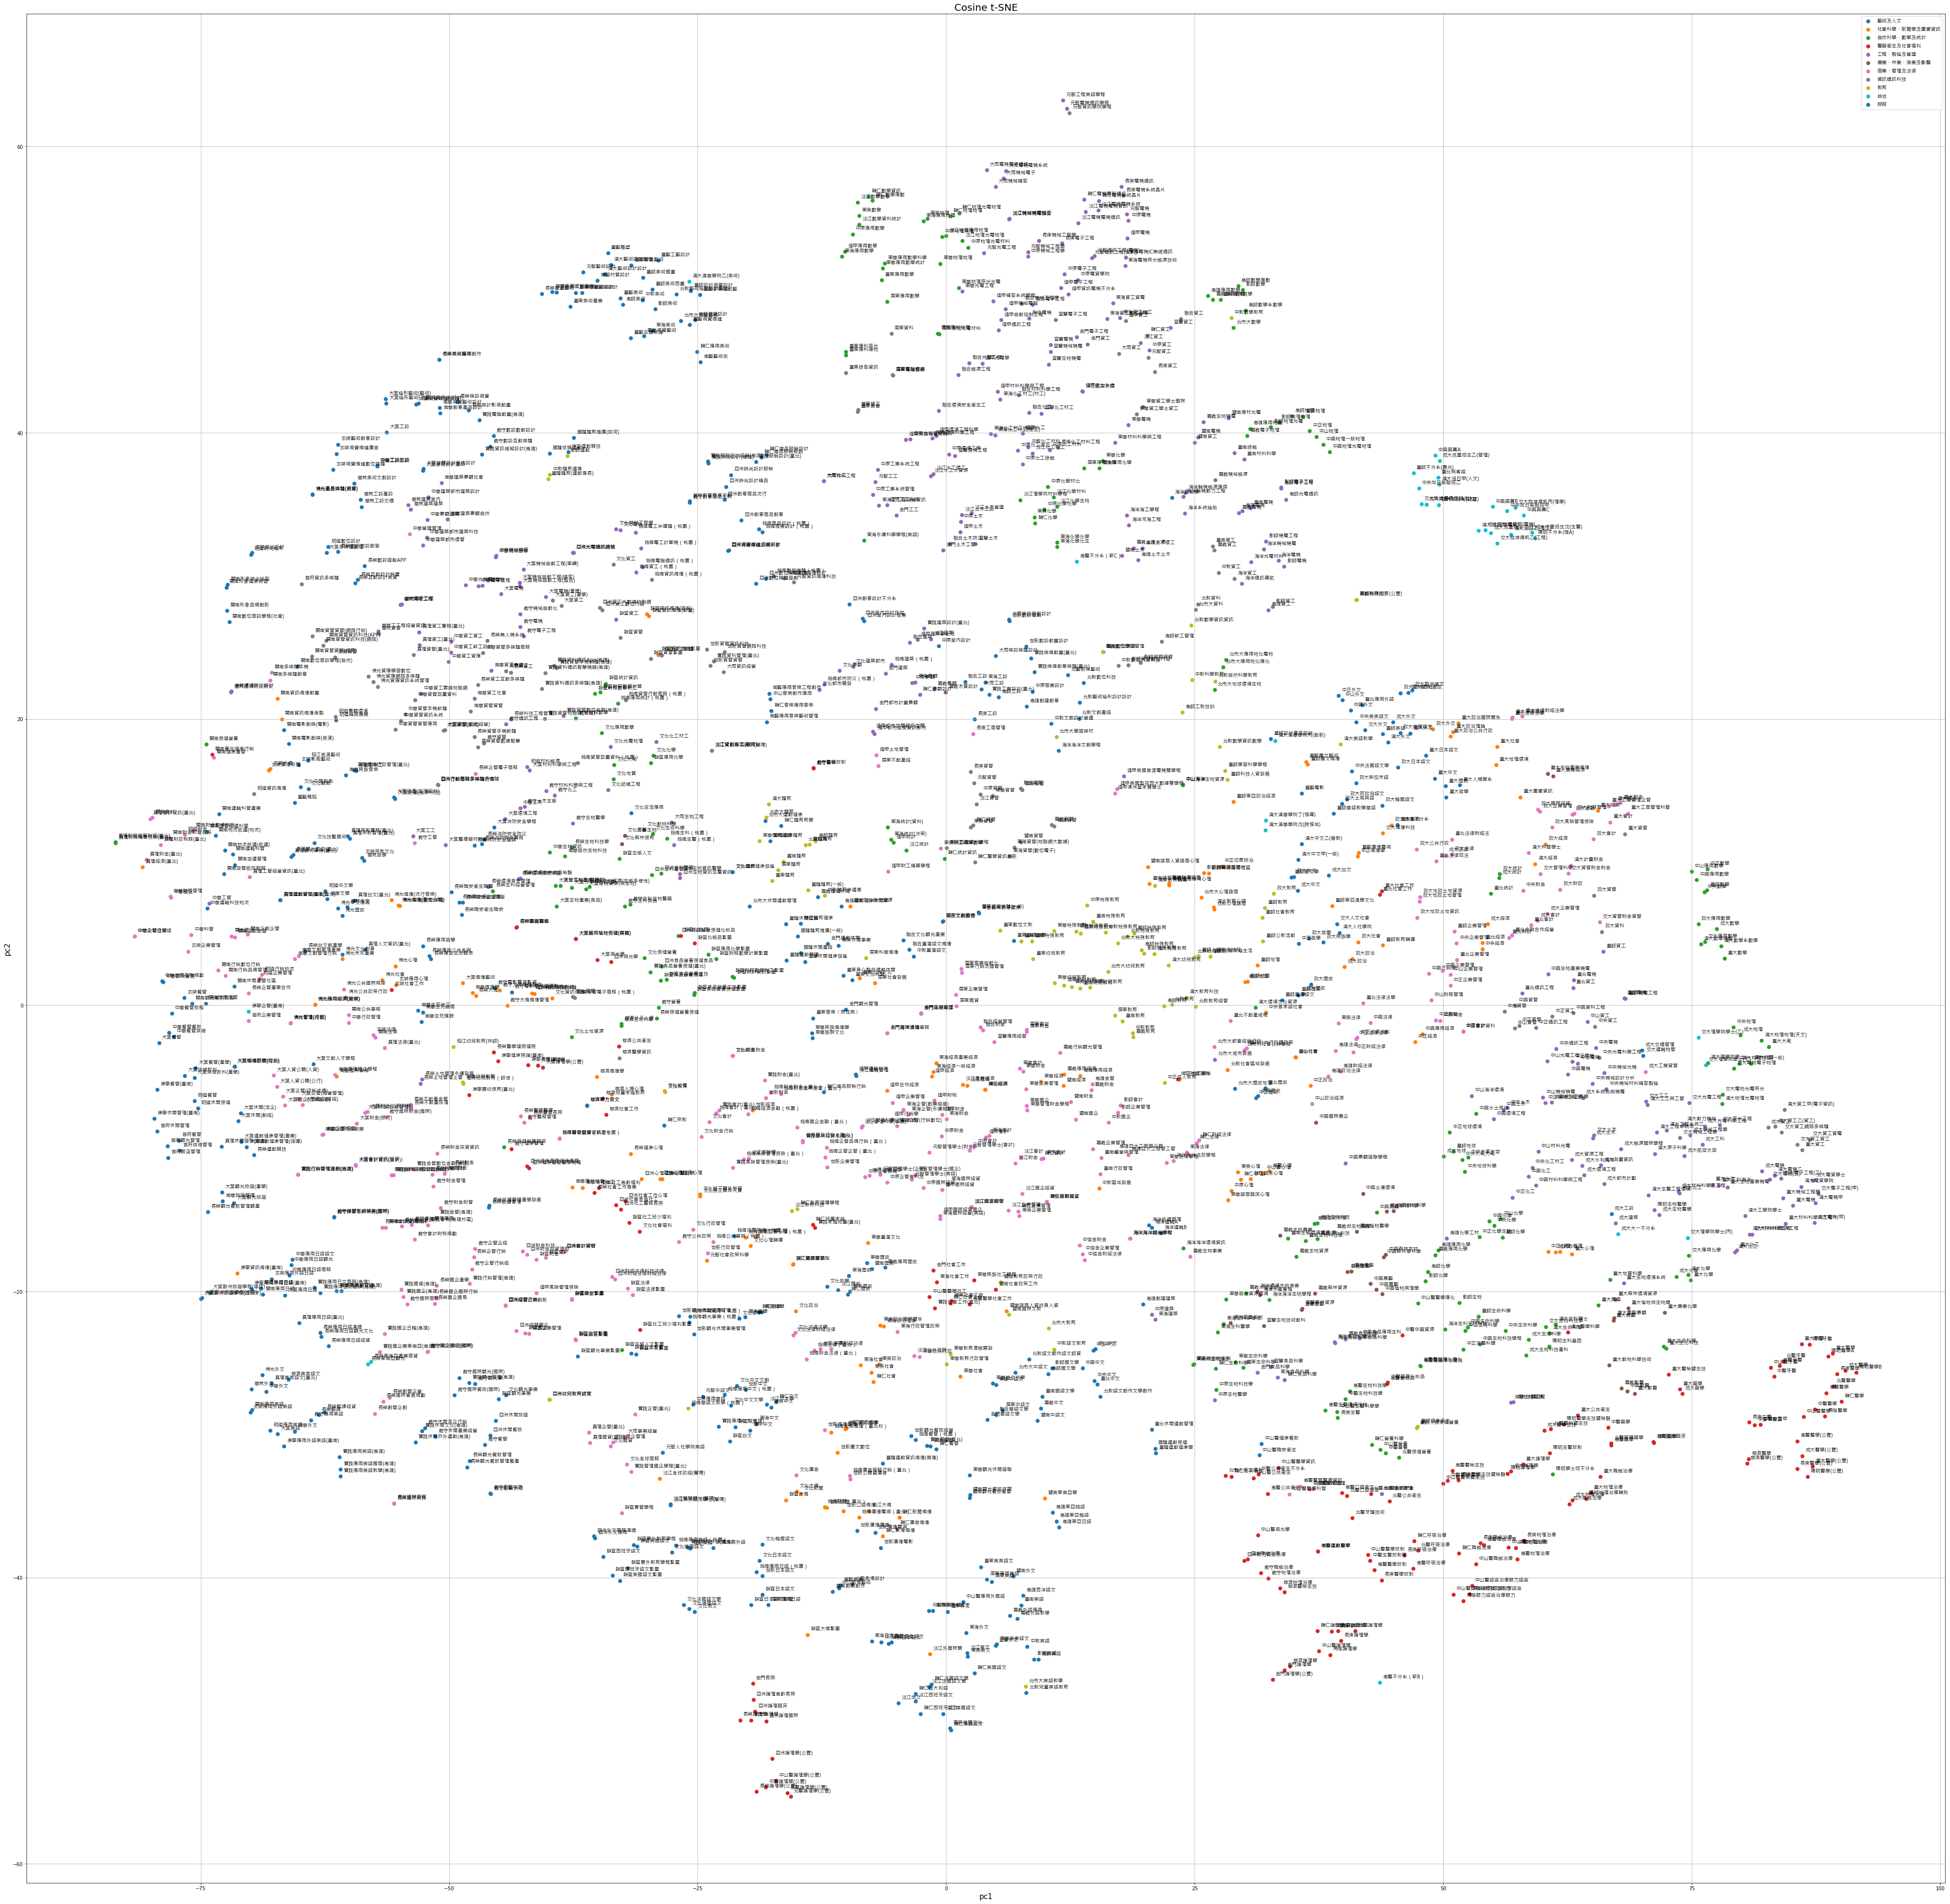

In [195]:
'''choose Cosine t-SNE'''
tsne_cosDf_Q3 = pd.concat([tsne_cosDf_final, todoDf['combine']], axis = 1)

fig = plt.figure(figsize = (70,70))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('Cosine t-SNE', fontsize = 20)
targets = tsne_cosDf_Q3['category_name'].unique()
for target in targets:
    indicesToKeep = tsne_cosDf_Q3['category_name'] == target
    x = tsne_cosDf_Q3.loc[indicesToKeep, 'pc1']
    y = tsne_cosDf_Q3.loc[indicesToKeep, 'pc2']
    ax.scatter(x, y, s = 50)
    
for i in range(len(tsne_cosDf_Q3)):
    
    plt.text(tsne_cosDf_Q3.iloc[i][0]+0.3, tsne_cosDf_Q3.iloc[i][1]+0.3, tsne_cosDf_Q3.iloc[i]['combine'], fontsize=3, fontproperties=myfont)
ax.legend(targets, prop=myfont)
ax.grid()
plt.savefig('hw4.jpg', dpi=300)

In [ ]:
'''
使用cosine t-SNE資料區分得較清楚，分得比較開，將圖放大後可以發現相似系所名稱的被分在一起
'''